In [1]:
import sys
import re
sys.path.insert(0, '../snow_terrain_tiles/')
sys.path.insert(0, './utils/')
from dem_utils import read_dem
from dem_utils import rasters_to_dict
from util import similarity_utils
from similarity_tests.similarity_metrics import compute_similarity
import matplotlib.pyplot as plt
import rasterio

In [2]:
d = rasters_to_dict('./example_data/')
pairs = similarity_utils.create_pairs(d)

In [3]:
print(pairs.keys())
print(len(pairs))

dict_keys(['2013 v. 2015', '2013 v. 2017', '2013 v. 2018', '2013 v. 2016', '2013 v. 2012', '2015 v. 2017', '2015 v. 2018', '2015 v. 2016', '2015 v. 2012', '2017 v. 2018', '2017 v. 2016', '2017 v. 2012', '2018 v. 2016', '2018 v. 2012', '2016 v. 2012', '2013 v. 2013', '2015 v. 2015', '2017 v. 2017', '2018 v. 2018', '2016 v. 2016', '2012 v. 2012'])
21


In [4]:
for p in pairs.keys():
    ys = [y for y in pairs[p].keys()]
    im1 = pairs[p][ys[0]]['arr']
    im2 = pairs[p][ys[1]]['arr']
    pairs[p]['results'] = compute_similarity(im1,im2)
#     plt.figure()
#     plt.title(p)
#     plt.suptitle(str(mse[0]))
#     plt.imshow(mse[1])

Computing Mean Square Error...
Computing Structural Similarity Index...
...Complete. Elapsed Time: 0.05626010301057249
Computing Mean Square Error...
Computing Structural Similarity Index...
...Complete. Elapsed Time: 0.047570591093972325
Computing Mean Square Error...
Computing Structural Similarity Index...
...Complete. Elapsed Time: 0.044939921936020255
Computing Mean Square Error...
Computing Structural Similarity Index...
...Complete. Elapsed Time: 0.04968635900877416
Computing Mean Square Error...
Computing Structural Similarity Index...
...Complete. Elapsed Time: 0.04654551902785897
Computing Mean Square Error...
Computing Structural Similarity Index...
...Complete. Elapsed Time: 0.04516532691195607
Computing Mean Square Error...
Computing Structural Similarity Index...
...Complete. Elapsed Time: 0.045226168003864586
Computing Mean Square Error...
Computing Structural Similarity Index...
...Complete. Elapsed Time: 0.04502528707962483
Computing Mean Square Error...
Computing Stru

In [5]:
pairs['2017 v. 2018']['results']

{'nrmse_val': 0.224,
 'nrmse_arr': array([[7.62710639e-04, 4.23028454e-04, 8.81639309e-04, ...,
         3.58045509e-04, 1.28536625e-02, 1.48642221e-02],
        [1.06373423e-04, 1.44546124e-04, 4.24284750e-04, ...,
         8.61956913e-04, 1.28952153e-02, 1.94934960e-02],
        [2.14900798e-03, 7.76388042e-04, 7.93487881e-04, ...,
         1.10050093e-03, 7.95736630e-03, 1.19698280e-02],
        ...,
        [4.77396010e-04, 5.38485028e-06, 7.29499501e-04, ...,
         2.23150868e-02, 3.09156417e-03, 4.39748075e-03],
        [3.28560913e-04, 7.20576054e-06, 5.14189771e-04, ...,
         1.82685386e-02, 1.43422186e-03, 3.05434642e-03],
        [9.51347431e-07, 3.50006769e-04, 1.25976268e-03, ...,
         1.15523199e-02, 9.48088418e-04, 1.41808728e-03]], dtype=float32),
 'ssim_val': 0.727202107876572,
 'ssim_arr': array([[0.96154497, 0.97620383, 0.98292376, ..., 0.75841167, 0.76237923,
         0.80858121],
        [0.94710158, 0.96714026, 0.97620761, ..., 0.77367876, 0.76935063,
  

In [7]:
j = pairs['2017 v. 2018']['results']['cwssim_arr']

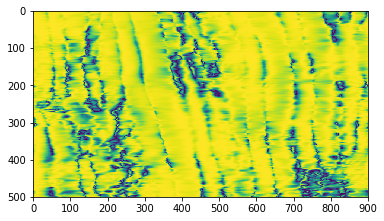

In [8]:
plt.imshow(j)